### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [6]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [7]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

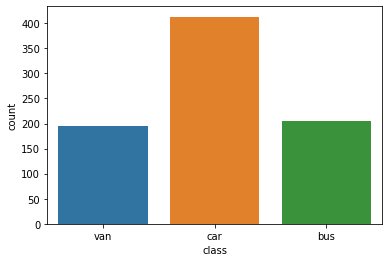

In [8]:
sns.countplot(df['class'])

### 3. Check for any missing values in the data 

In [9]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#there are no missing values as we have dropped all the missing values

### 4. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [10]:
#Scaling
from scipy.stats import zscore

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [12]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [13]:
df1 = df.copy()
df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [14]:
cols = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']
df1 = df[cols].applymap(np.int64)


In [15]:
df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95           48                    83           178   
1           91           41                    84           141   
2          104           50                   106           209   
3           93           41                    82           159   
4           85           44                    70           205   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                   103                       52            149   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42                      20                        159   
1             45                      19                        143   
2             32                      23                        158   
3             46                      19                        143   
4             45                      19                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176                379                        184   
1              170                330                        158   
2              223                635                        220   
3              160                309                        127   
4              241                325                        188   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70               6                16   
1                           72               9                14   
2                           73              14                 9   
3                           63               6                10   
4                          127               9                11   

   skewness_about.2  hollows_ratio  
0               187            197  
1               189            199  
2               188            196  
3               199            207  
4               180            183

In [16]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [17]:
df1 = df1.apply(zscore)

In [18]:
df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

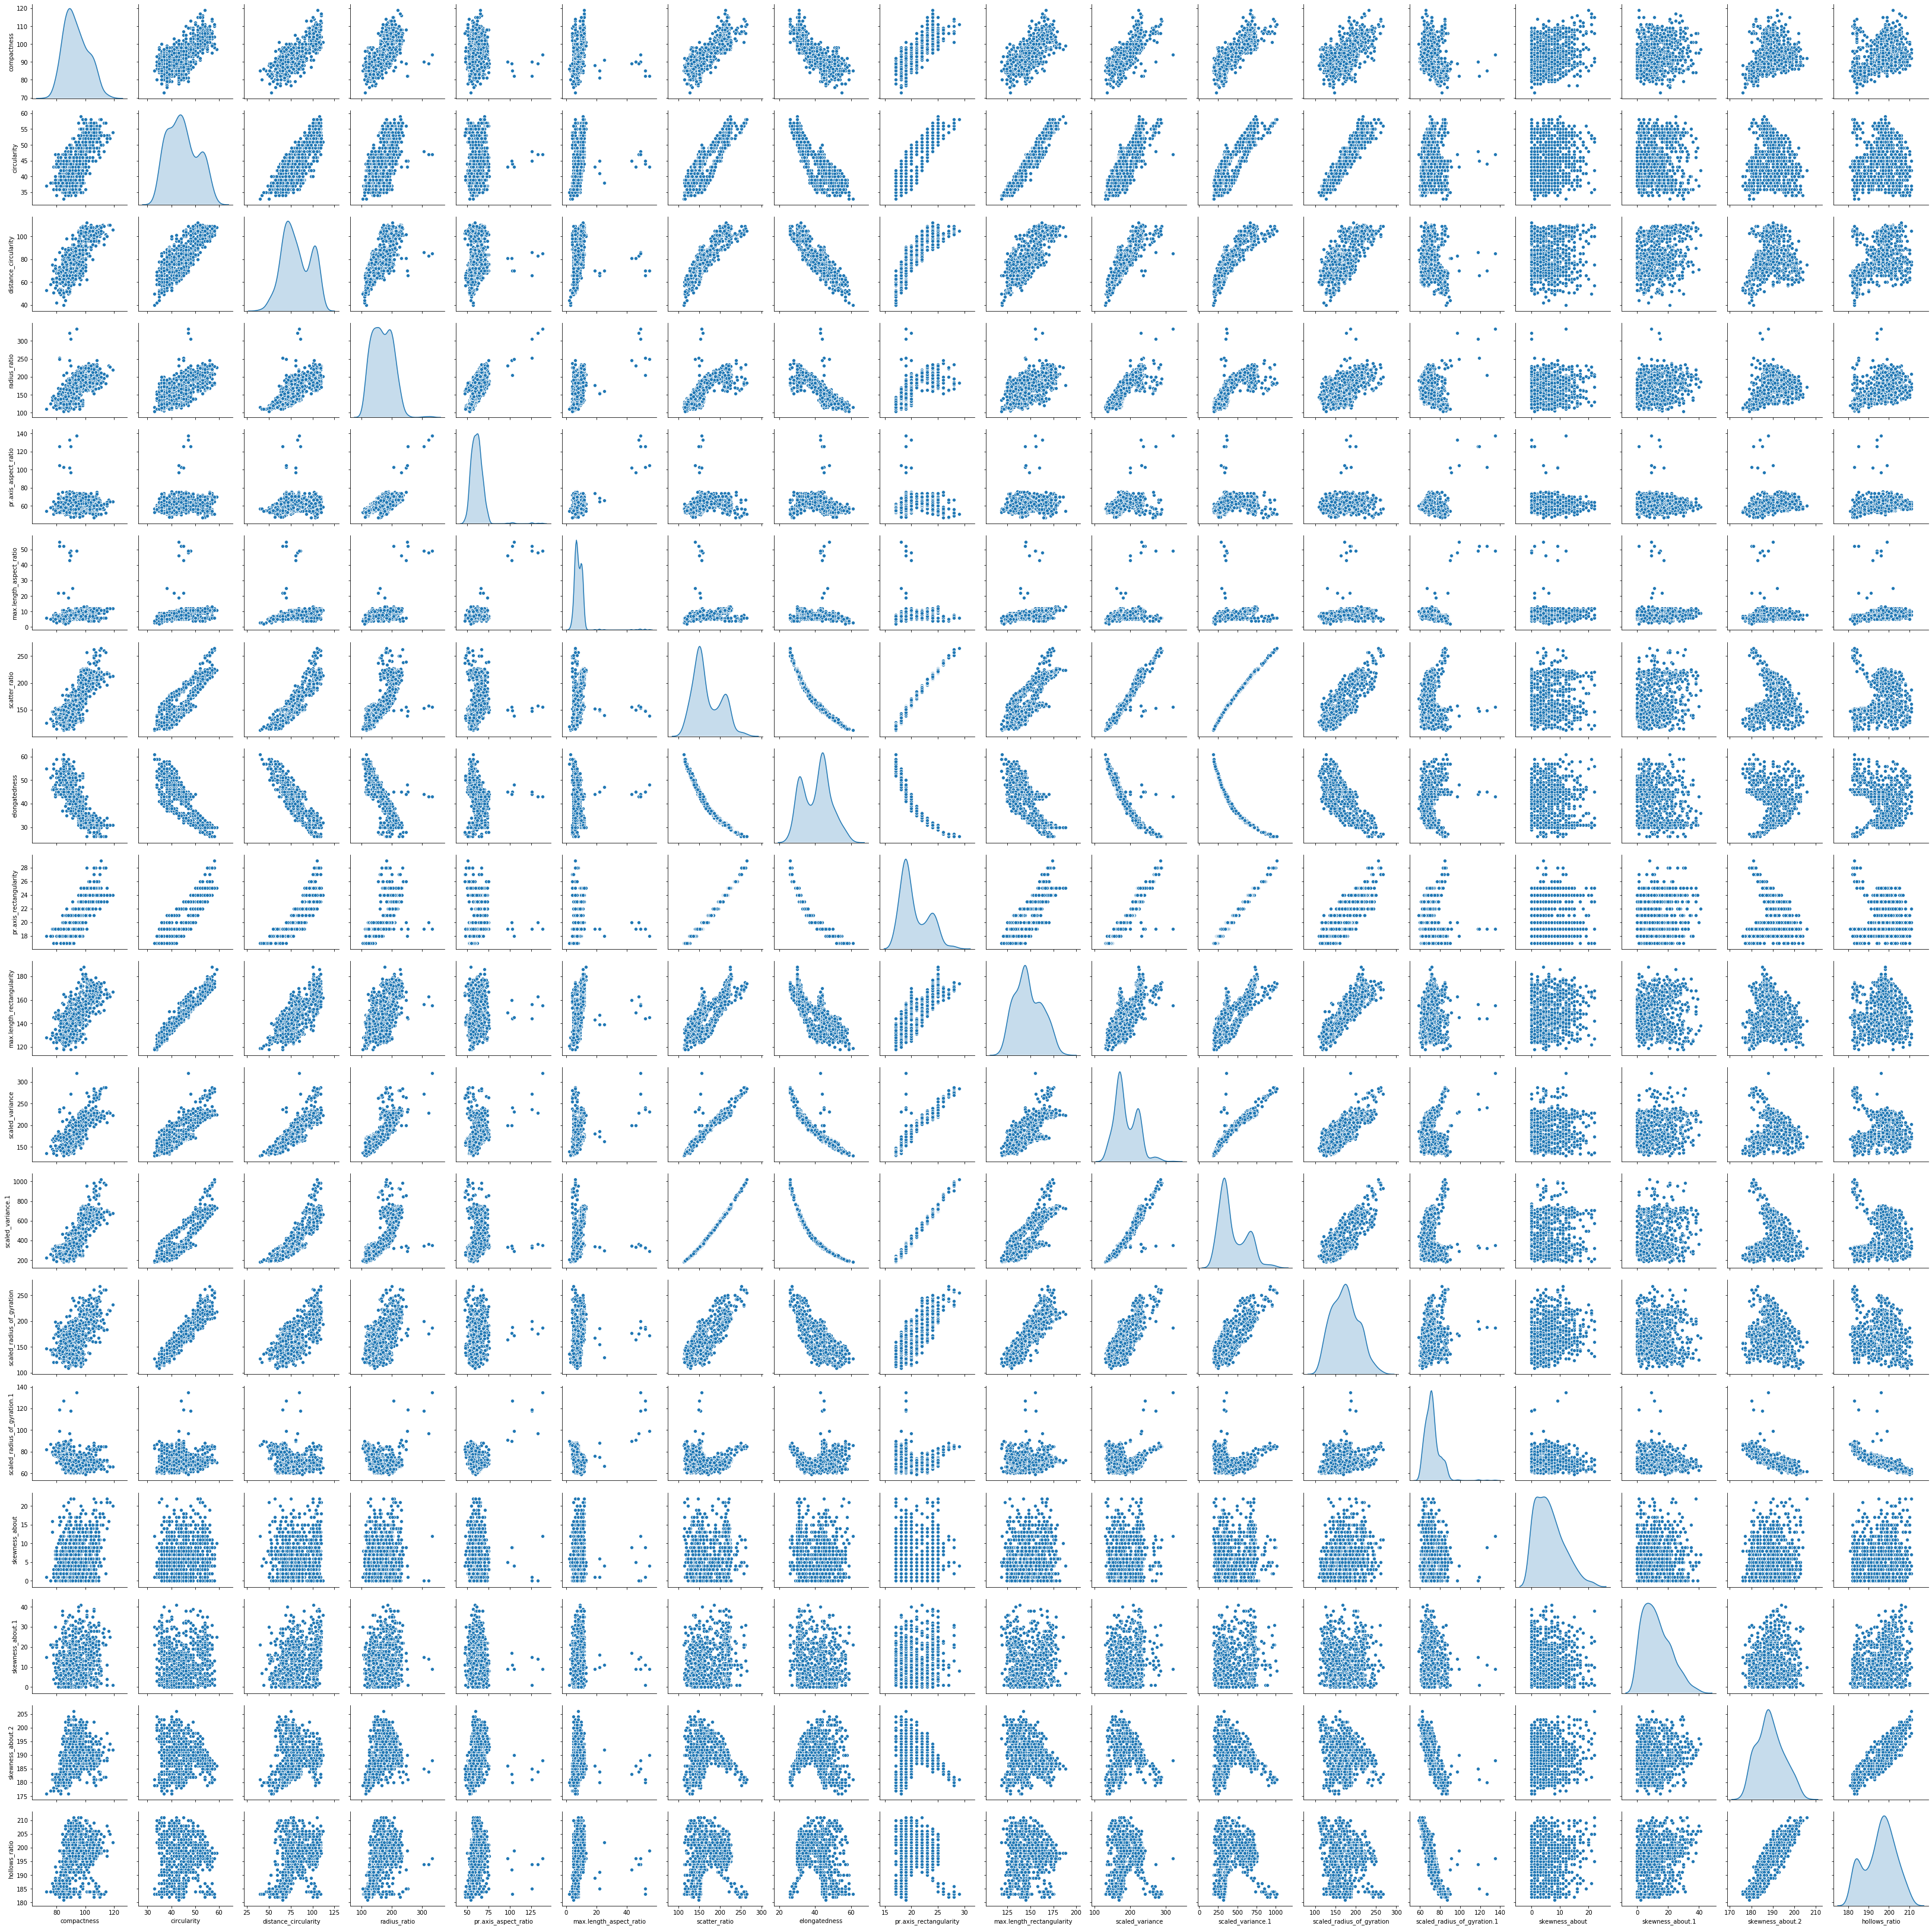

In [19]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

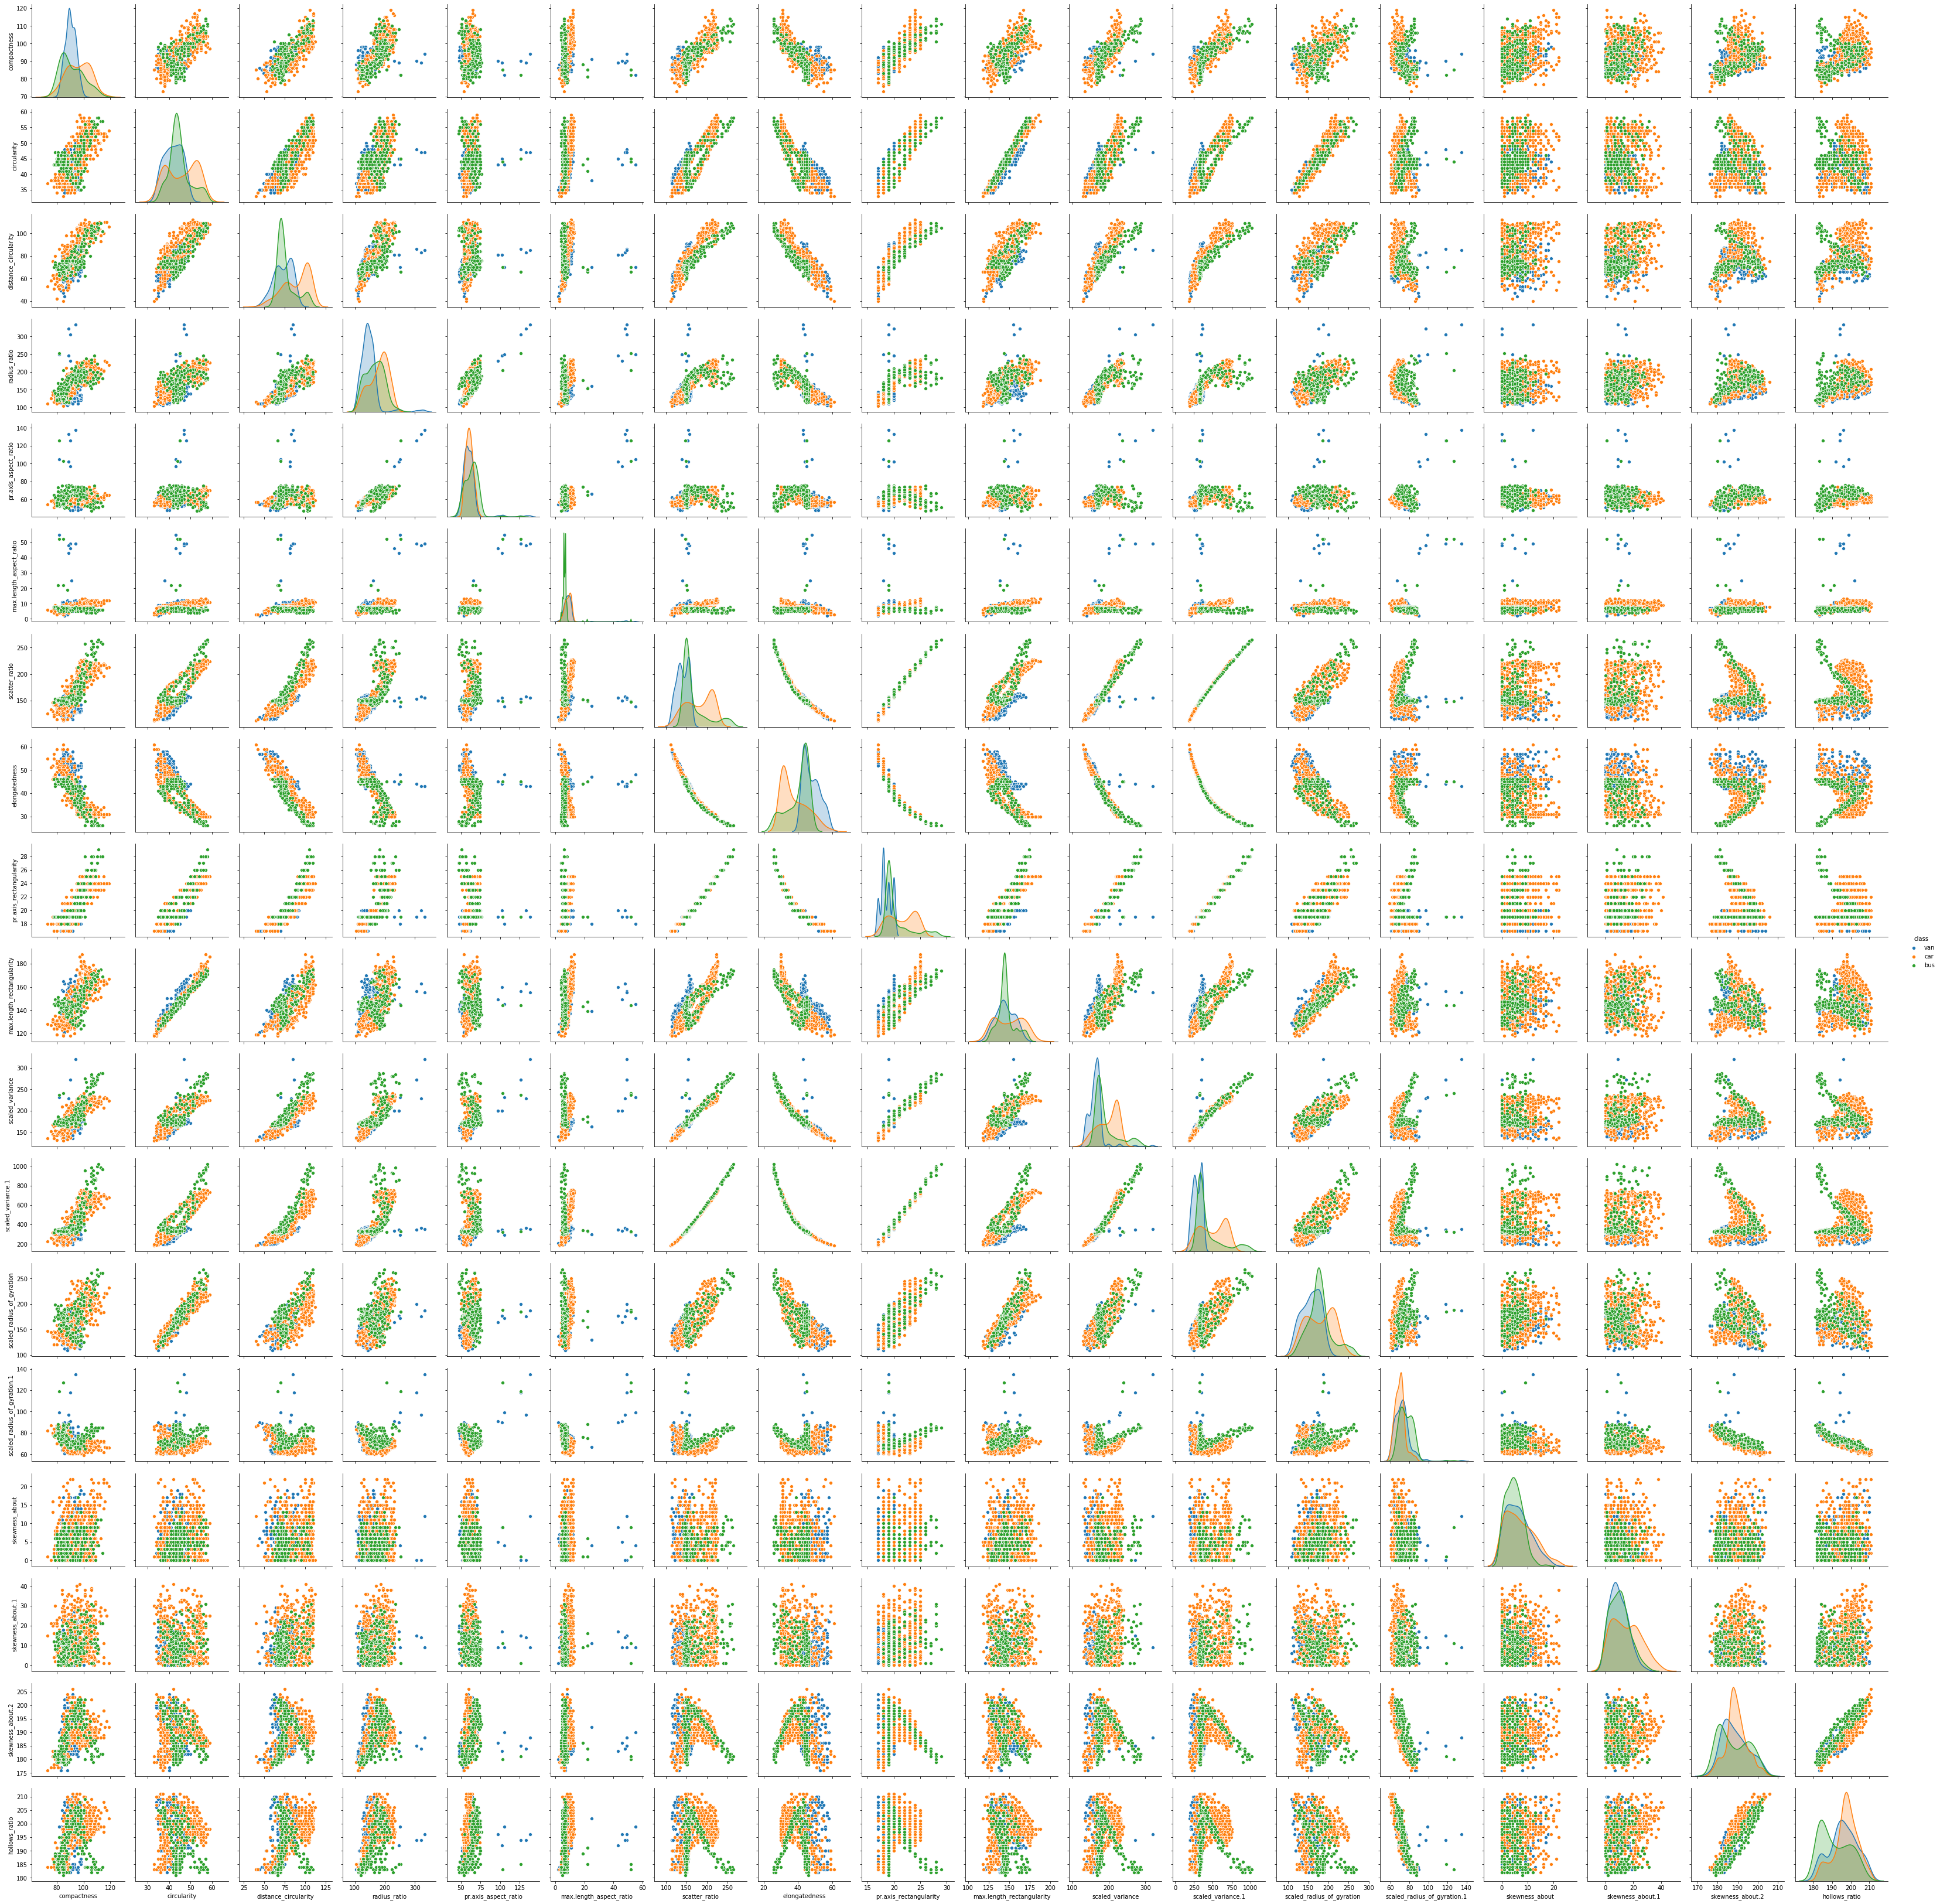

In [20]:
sns.pairplot(df,diag_kind='kde', hue='class')

### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [21]:
model = KMeans(n_clusters = 3)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

In [32]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df1)
 # labels = clusters.labels_
 # centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    14634.000000
1              2     8623.136976
2              3     7037.467395
3              4     5739.201327
4              5     5189.588855
5              6     4706.433256
6              7     4348.840290
7              8     4107.162311
8              9     3847.195192
9             10     3659.752922
10            11     3465.784217
11            12     3334.981478
12            13     3213.034315
13            14     3144.814548

### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

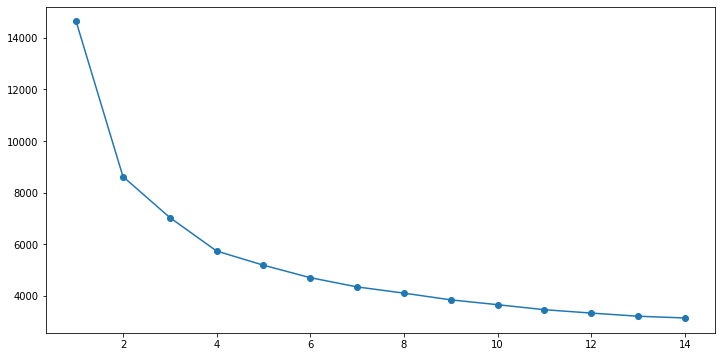

In [33]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### 8. Find out the optimal value of K

here we can take the value of k as 3

In [34]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [35]:
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [37]:
centroids = kmeans.cluster_centers_
centroids

array([[ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

In [39]:
centroid_df = pd.DataFrame(centroids, columns = list(df1) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0     1.130765     1.170942              1.195006      1.019095   
1    -0.233962    -0.573875             -0.307769     -0.030413   
2    -0.919871    -0.520093             -0.893208     -1.064356   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.215052                 0.342508       1.271805   
1              0.205073                -0.116532      -0.459042   
2             -0.500422                -0.219074      -0.779121   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -1.190612                1.275484                   1.092668   
1       0.325063               -0.487988                  -0.536044   
2       0.865893               -0.745356                  -0.484632   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         1.220381           1.281327                   1.079542   
1        -0.413809          -0.463663                  -0.601550   
2        -0.782403          -0.783411                  -0.384982   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.028795        0.162290          0.265665   
1                    -0.619241       -0.061780          0.010668   
2                     0.838787       -0.095243         -0.301716   

   skewness_about.2  hollows_ratio  
0         -0.005356       0.183801  
1          0.812786       0.698973  
2         -1.054206      -1.110695

### 11. Use kmeans.labels_ function to print out the labels of the classes

In [40]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [41]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
df_labeled = df1.join(df_labels)

### 12. Use kmeans.labels_ function to print out the labels of the classes

In [42]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis

compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
4      -1.052030    -0.130753             -0.763506      1.068668   
..           ...          ...                   ...           ...   
841    -0.079822    -0.944703              0.314261      0.413803   
842    -0.565926     0.194828              0.124067     -0.181529   
843     1.500018     1.497149              1.201833      1.574700   
844    -0.930504    -1.433074             -0.256321     -0.687560   
845    -1.052030    -1.433074             -1.017098     -1.372192   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                1.283254                 0.299721      -0.198517   
1               -0.599253                 0.085785      -0.591720   
2                0.530251                 0.299721       1.162569   
3                0.153750                 0.085785      -0.742952   
4                5.173770                 9.285029      -0.591720   
..                    ...                      ...            ...   
841              0.279250                -0.128151       0.013207   
842              0.530251                 0.513657      -0.289256   
843              0.655752                 0.727593       1.616264   
844             -0.473753                -0.342087      -1.015169   
845             -0.850254                -0.769959      -1.468864   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0         0.129648               -0.217151                   0.766312   
1         0.514333               -0.606014                  -0.337462   
2        -1.152637                0.949438                   0.697326   
3         0.642562               -0.606014                  -0.337462   
4         0.514333               -0.606014                  -0.268476   
..             ...                     ...                        ...   
841      -0.126809               -0.217151                  -0.958335   
842       0.257876               -0.217151                   0.766312   
843      -1.409094                1.727163                   1.732113   
844       1.155476               -0.994877                  -1.648193   
845       1.924847               -1.383740                  -1.372250   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0          -0.397397          -0.339014                   0.301676   
1          -0.590034          -0.618754                  -0.502972   
2           1.111591           1.122486                   1.415804   
3          -0.911095          -0.738643                  -1.462359   
4           1.689501          -0.647299                   0.425468   
..               ...                ...                        ...   
841         0.373150          -0.093528                  -0.781504   
842        -0.493716          -0.401813                   0.054092   
843         1.272121           1.613458                   0.796844   
844        -1.071626          -0.961293                  -0.812452   
845        -1.553218          -1.292414                  -1.338567   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                      -0.321192       -0.071523          0.371287   
1                      -0.053505        0.538425          0.147109   
2                       0.080339        1.555006         -0.413338   
3                      -1.258099       -0.071523         -0.301249   
4                       7.307905        0.538425         -0.189159   
..                           ...             ...               ...   
841                    -0.053505        0.131793          1.380091   
842                    -0.053505       -1.088104          0.819644   

In [43]:
df_labeled['labels'].value_counts() 

1    297
0    251
2    232
Name: labels, dtype: int64

In [44]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

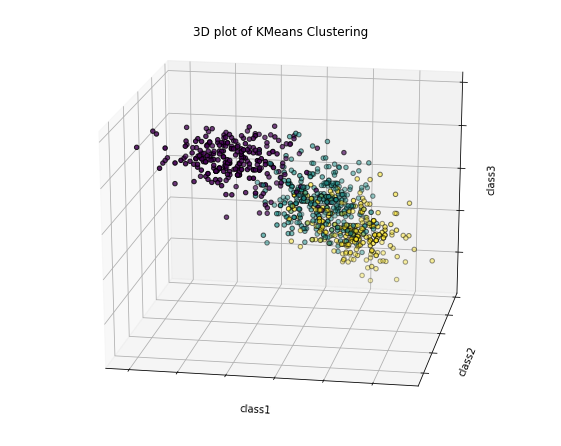

In [47]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df1)
labels = kmeans.labels_
ax.scatter(df1.iloc[:, 0], df1.iloc[:, 1], df1.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('class1')
ax.set_ylabel('class2')
ax.set_zlabel('class3')
ax.set_title('3D plot of KMeans Clustering')